In [5]:
from Binaries import *

ownline_fitparams = np.loadtxt("/cr/data01/filip/models/HardwareClassifier/ROC_curve/random_traces_downsampled_scaled/fit_params.csv")
offline_fitparams = np.loadtxt("/cr/tempdata01/filip/QGSJET-II/LTP/fitparams.csv", usecols = [4,5,6])

denseLTP_19 = np.loadtxt("/cr/tempdata01/filip/QGSJET-II/LTP/LTP_1000/denseCalculation_19_19.5.csv")
denseLTP_18 = np.loadtxt("/cr/tempdata01/filip/QGSJET-II/LTP/LTP_1000/denseCalculation_18.5_19.csv")
theta_cut = [0, 26, 38, 49, 60, 90]

# mask = [theta_cut[i] <= denseLTP[:, 0] < theta_cut[i + 1] for i in range(len(theta_cut) - 1)]

vertical19 = denseLTP_19[:, 0] < 26
vertical18 = denseLTP_18[:, 0] < 26

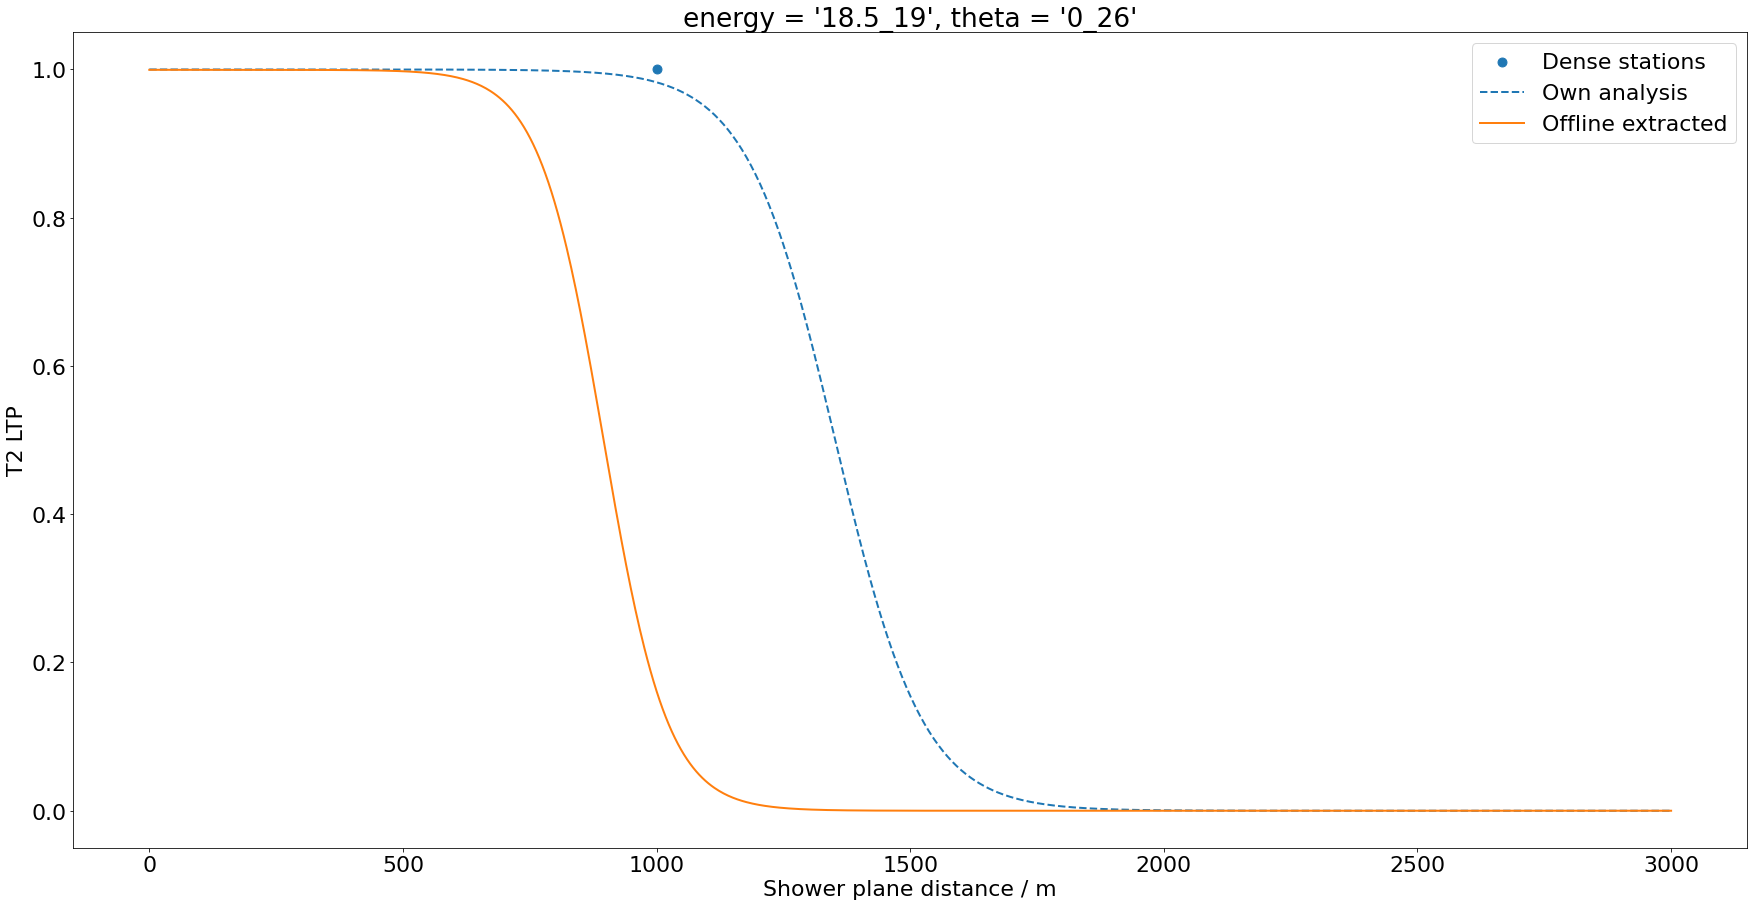

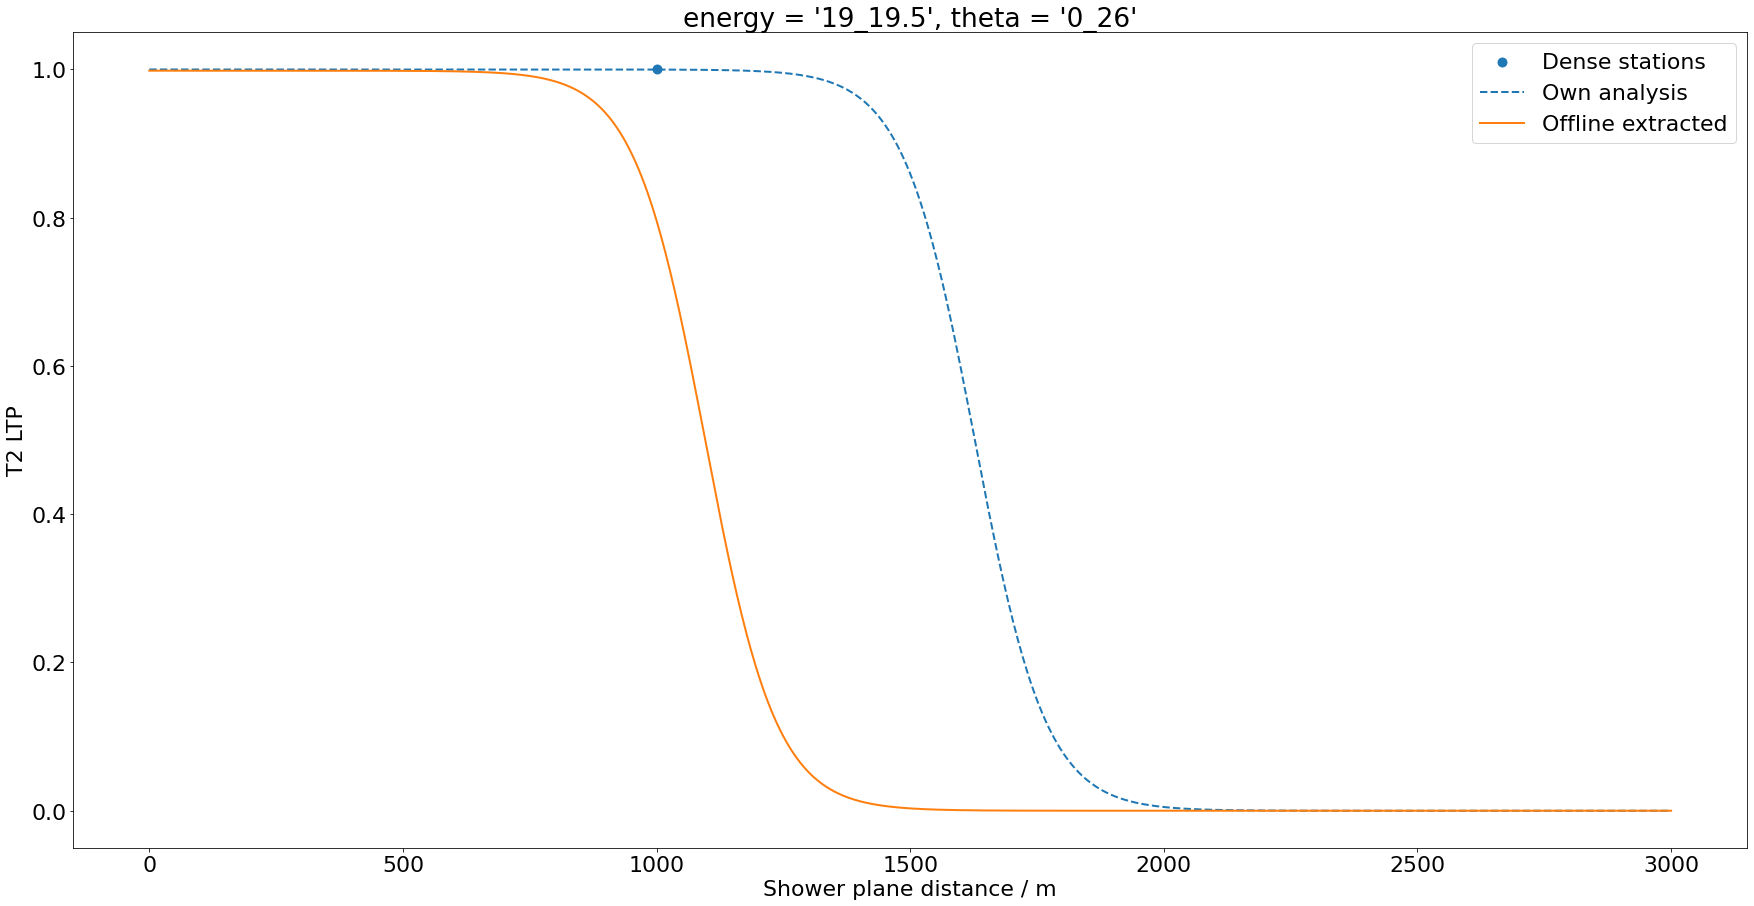

In [6]:
step = 0

# plt.rcParams["figure.figsize"] = [10, 5]

for energy in ["16_16.5", "16.5_17", "17_17.5", "17.5_18", "18_18.5", "18.5_19", "19_19.5"]:

    for theta in ["0_26", "26_38", "38_49", "49_60", "60_90"]:

        if energy in ["19_19.5", "18.5_19"] and theta == "0_26":

            plt.figure()
            plt.title(f"{energy = }, {theta = }")

            denseLTP = np.mean((denseLTP_19 if energy == "19_19.5" else denseLTP_18)[vertical19 if energy == "19_19.5" else vertical18][:,1])

            plt.scatter(1000, denseLTP, s = 80, label = "Dense stations")

            X = np.linspace(0, 3000, 1000)
            plt.plot(X, station_hit_probability(X, *ownline_fitparams[step]), ls = "--", label = "Own analysis", lw = 2)
            plt.plot(X, station_hit_probability(X, *offline_fitparams[step]), label = "Offline extracted", lw = 2)
            plt.legend()
            plt.xlabel("Shower plane distance / m")
            plt.ylabel("T2 LTP")

        step += 1

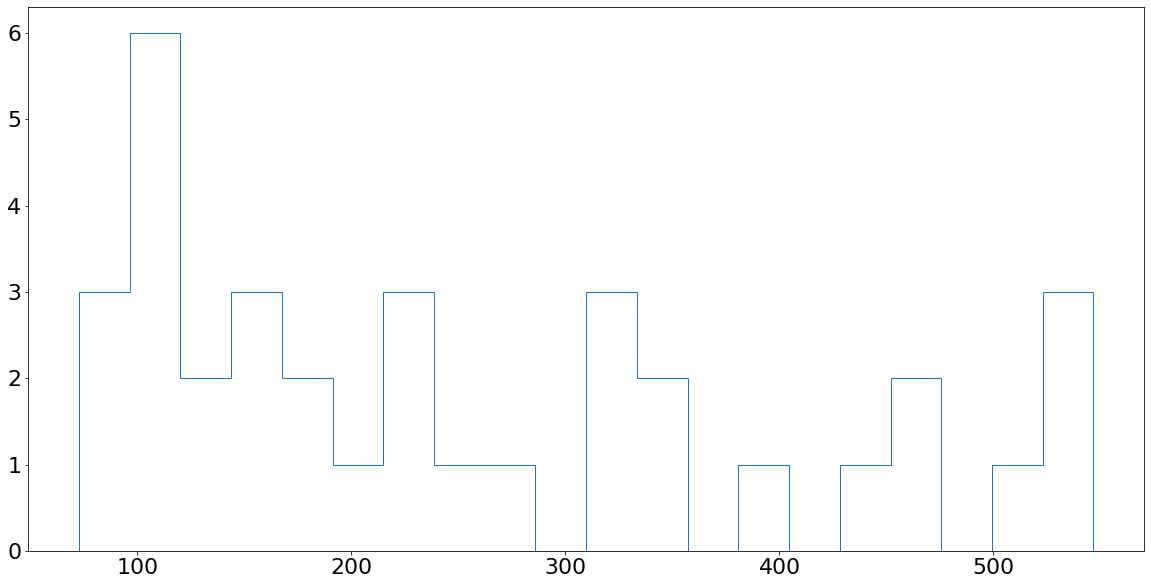

In [15]:
plt.rcParams["figure.figsize"] = [20, 10]

_ = plt.hist((ownline_fitparams - offline_fitparams)[:, 1], histtype = "step", bins = 20)